<a href="https://colab.research.google.com/github/h0806449f/PyTorch/blob/main/MSFT_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **基本操作**

In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# 資料型態轉換
list_data = [ [1, 2], [3, 4] ]

# from list to tensor
data_to_tensor = torch.tensor(list_data)

# from list to np_array
data_to_array = np.array(list_data)

# from np_array to tensor
array_to_tensor = torch.from_numpy(data_to_array)

#
print(f"Type: {type(list_data)}\n{list_data}")
print("\nList to tensor")
print(f"Type: {type(data_to_tensor)}\n{data_to_tensor}")
print("\nList to array")
print(f"Type: {type(data_to_array)}\n{data_to_array}")
print("\nArray to tensor")
print(f"Type: {type(array_to_tensor)}\n{array_to_tensor}")

Type: <class 'list'>
[[1, 2], [3, 4]]

List to tensor
Type: <class 'torch.Tensor'>
tensor([[1, 2],
        [3, 4]])

List to array
Type: <class 'numpy.ndarray'>
[[1 2]
 [3 4]]

Array to tensor
Type: <class 'torch.Tensor'>
tensor([[1, 2],
        [3, 4]])


In [64]:
# 複製已存在的 tensor shape
torch.ones_like(array_to_tensor), torch.zeros_like(array_to_tensor)

(tensor([[1, 1],
         [1, 1]]),
 tensor([[0, 0],
         [0, 0]]))

In [65]:
# 指定 tensor shape, random data
SHAPE = (2, 3)

rand_tensor = torch.rand(SHAPE)
rand_tensor

tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])

In [66]:
# 檢視 tensor 相關資訊
print(rand_tensor.shape)
print(rand_tensor.dtype)
print(rand_tensor.device)

torch.Size([2, 3])
torch.float32
cpu


In [67]:
# 設置 tensor 運作於何種裝置上
device = "cude" if torch.cuda.is_available() else "cpu"

In [68]:
# 基本 tensor 操作_1
list_1 = [ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16] ]
tensor_1 = torch.tensor(list_1)

print(tensor_1)
print(f"First row:\n{tensor_1[0]}\n")
print(f"First column:\n{tensor_1[:, 0]}\n")
print(f"Last column:\n{tensor_1[..., -1]}")

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
First row:
tensor([1, 2, 3, 4])

First column:
tensor([ 1,  5,  9, 13])

Last column:
tensor([ 4,  8, 12, 16])


In [69]:
# 基本 tensor 操作_2
tensor_2 = torch.rand((2, 3))

# 水平整合
h = torch.cat([tensor_2, tensor_2, tensor_2], dim=1)
h

# 垂直整合
v = torch.cat([tensor_2, tensor_2, tensor_2], dim=0)
v

tensor([[0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739],
        [0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739],
        [0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739]])

In [70]:
# 基本 tensor 操作_3 (乘除, 注意shape)
torch.manual_seed(42)
tensor_3 = torch.rand((2, 3))

result_1 = tensor_3 @ tensor_3.T

result_2 = torch.matmul(tensor_3, tensor_3.T)
result_2

tensor([[1.7622, 1.4337],
        [1.4337, 1.4338]])

# **Dataset & Dataloader**
1. **Dataset**: data, label
2. **Dataloader**: iterable
3. **Fashion-MNIST** as example


In [71]:
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

## Dataset
1. Dataset
2. Show image from Dataset

In [78]:
# 訓練資料集, 測試資料集
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()) # 將每個圖像轉換成tensor形式, 並將數值轉換至 0 - 1 之間

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor())

In [91]:
# 了解 Dataset 資料結構
# 每組資料 -> (image, label)
train_dataset[0]

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


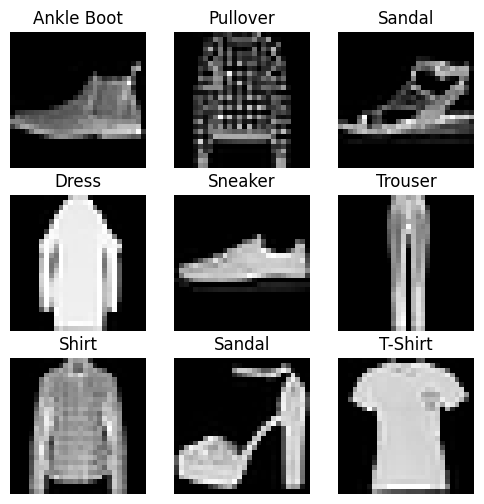

In [90]:
# 從dataset 中, 隨機顯示10張圖片

figure = plt.figure(figsize=(6,6))
cols, rows = 3, 3

for i in range(1, 10):
    # 隨機取train_dataset長度的數字，size一維化, item()轉為Python整數
    sample_index = torch.randint(len(train_dataset), size=(1,)).item()
    image, label = train_dataset[sample_index]

    figure.add_subplot(cols, rows, i)
    plt.title(labels_map[label])
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis("off")

In [87]:
# # 同效果
# plt.figure(figsize=(6,6))
# cols, rows = 3, 3

# for i in range(1, 10):
#     # 隨機取train_dataset長度的數字，size一維化, item()轉為Python整數
#     sample_index = torch.randint(len(train_dataset), size=(1,)).item()
#     image, label = train_dataset[sample_index]

#     plt.subplot(cols, rows, i)
#     plt.title(labels_map[label])
#     plt.imshow(image.squeeze(), cmap="gray")
#     plt.axis("off")

## DataLader
1. DataLoader
2. Show image from DataLoader

In [88]:
# DataLoader
train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True # 每個 "epoch" 都會對數據 洗牌
)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = 64,
    shuffle = True
)

In [104]:
image, label = next(iter(train_dataloader))

print(image.size(), "-> batch_size, 灰階圖, height, width")
print(label.size())

torch.Size([64, 1, 28, 28]) -> batch_size, 灰階圖, height, width
torch.Size([64])


(-0.5, 27.5, 27.5, -0.5)

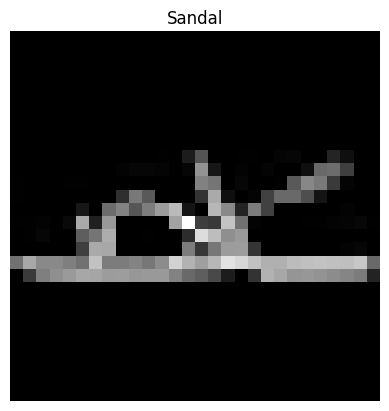

In [110]:
plt.imshow(image[0].squeeze(), cmap="gray")
plt.title(labels_map[label[0].item()])
plt.axis("off")

## One-hot encoding

In [114]:
# transform -> lambda 解釋
# 創造zeros tensor
# scatter_ -> 0:"T-shirt" 將index 0 的數值, 轉換為1 [1, 0, 0, 0, ...] 達成 one-hot encoding 效果

lambda y :torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)

<function __main__.<lambda>(y)>

In [115]:
# train_datasets and test_dataset
train_dataset = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y :torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

test_dataset = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y :torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

In [121]:
# check
train_dataset[0][1], test_dataset[0][1]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

# **Model**
1. model_1 **without** training

In [122]:
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

In [124]:
# device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [127]:
# Module class (建立架構)

class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()

        self.flatten = nn.Flatten()

        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU())

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [128]:
# 依架構 建立模型
model_1 = CNN_1().to(device)
model_1

CNN_1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [134]:
# 創造隨機資料, 通過模型
# 隨機資料
X = torch.rand(1, 28, 28).to(device)

# 通過模型 -> logits
logits = model_1(X)

# 轉換成 "加總為一" 的機率
pred_probility = nn.Softmax(dim=1)(logits)

# 取機率中的最大值
train_pred = pred_probility.argmax(dim=1)

#
print(f"預測為: {labels_map[train_pred.item()]}")

預測為: Shirt


In [138]:
# 取模型中 特定層輸出
specific_weight = model_1.linear_stack[0].weight

specific_bias = model_1.linear_stack[0].bias

# **Loss_fn, Optimizer, training_loop and testing_loop**


In [150]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import torch.optim as optim

In [141]:
# Dataset
train_dataset = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor())

test_dataset = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor())

In [142]:
# DataLoader
train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = 64,
    shuffle = True)

In [143]:
# Model structure
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()

        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU(),
        )

    def dorward(self, x):
        x = self.flatten(x)
        ligits = self.linear_stack(x)
        return logits

In [146]:
# Build model and check info
model_2 = CNN_2().to(device)
model_2

CNN_2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [153]:
# Loss_fn, optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [ ]:
# training loop & testing loop
